In [1]:
import json
import csv
import numpy as np

from src.kohonen import train_kohonen
from src.kohonen import plot_heatmap_kohonen
from src.kohonen import plotVariableHeatMap
from src.kohonen import plotDistanceHeatMap
from src.kohonen import plot_heatmap_kohonen
from src.kohonen import plot_heatmap_kohonenNames
from src.kohonen import plot_boxplot

In [2]:
def read_and_load_csv_data():
    with open('docs/europe.csv', 'r') as csv_file:
        plots = csv.reader(csv_file, delimiter=',')
        next(plots)   # Para skipear la linea de Contry, Area y eso

        data = []
        countries=[]

        for row in plots:
            countries.append(str(row[0]))
            data.append([int(row[1]), int(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7])])

        csv_file.close()

    return data, countries


def read_and_load_json_data(alg_name):
    with open('./config.json', 'r') as config_file:
        data_from_json = json.load(config_file)
        config_file.close()

    if(alg_name in data_from_json):
        config = data_from_json[alg_name]
        learning_rate = float(config["learning_rate"])
        initial_radius = int(config["initial_radius"])
        final_radius = int(config["final_radius"])
        max_iterations = int(config["max_iterations"])
        k = int(config["k"])

    return learning_rate, initial_radius, final_radius, max_iterations, k


In [3]:

alg_name = "kohonen"
data, countries = read_and_load_csv_data()
data = np.array(data)
learning_rate, initial_radius, final_radius, max_iterations, k = read_and_load_json_data(alg_name)
weights,choices,results,distances,estandarizedData = train_kohonen(data, k, max_iterations, learning_rate, initial_radius, final_radius,countries)

c:\Users\Mateo\Documents\ITBA\2023S1\SIA\TPs-SIA\TP4\src\kohonen.py:226: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


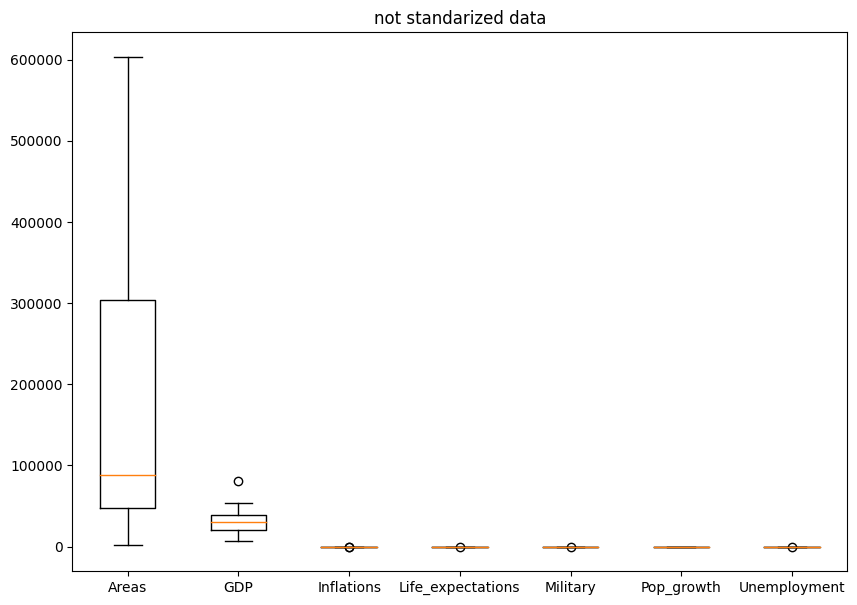

c:\Users\Mateo\Documents\ITBA\2023S1\SIA\TPs-SIA\TP4\src\kohonen.py:226: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


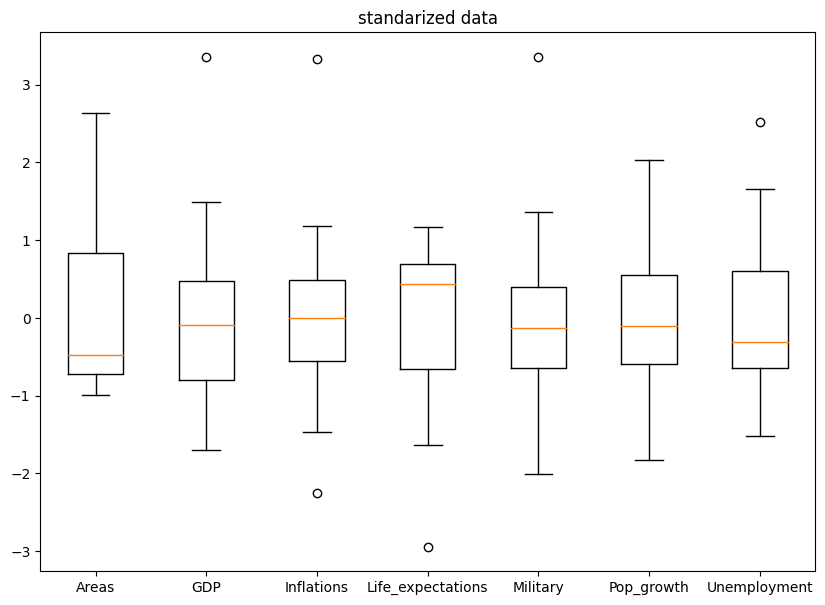

In [4]:
plot_boxplot(data,"not standarized data")
plot_boxplot(estandarizedData,"standarized data")

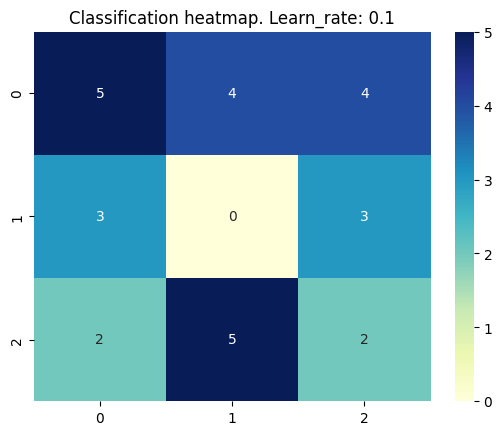

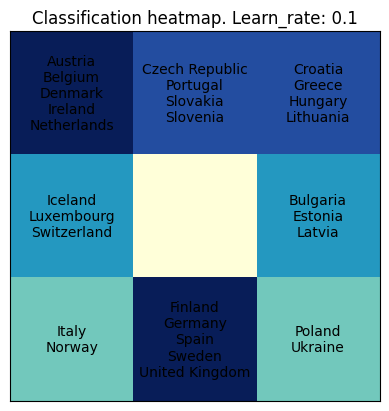

In [5]:
plot_heatmap_kohonen(results, k, learning_rate)
plot_heatmap_kohonenNames(results, k, learning_rate)

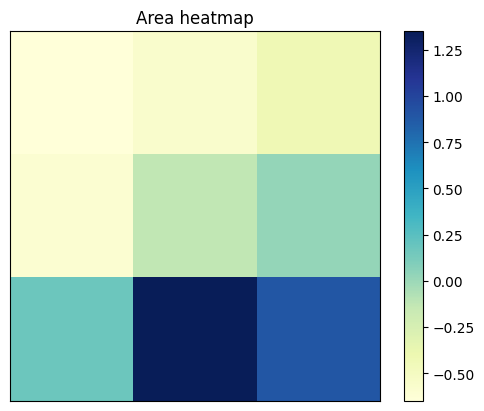

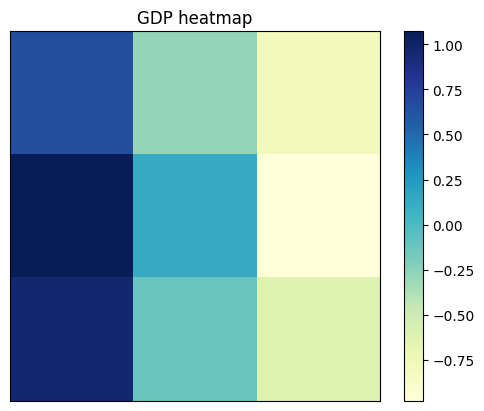

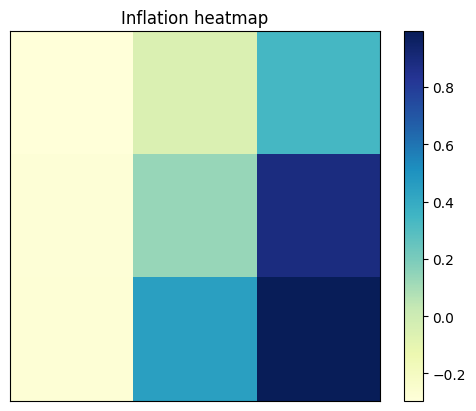

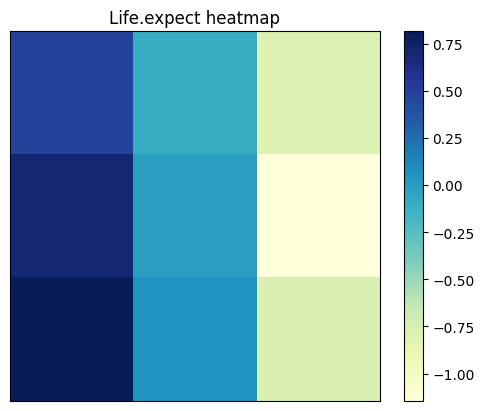

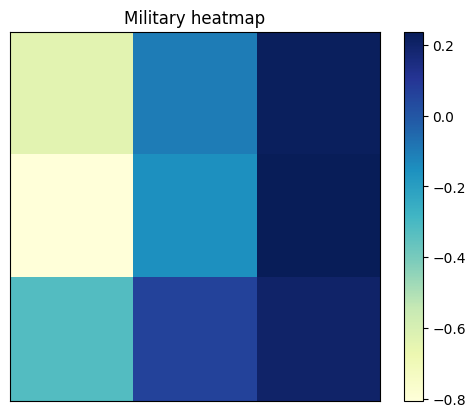

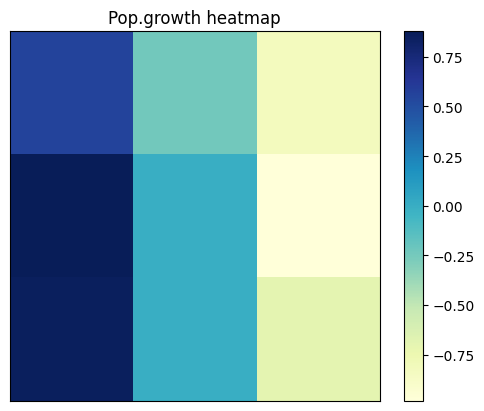

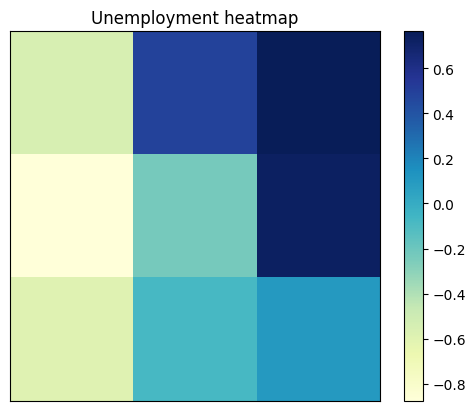

In [6]:
names=["Area","GDP","Inflation","Life.expect","Military","Pop.growth","Unemployment"]
aux=np.transpose(weights)
for i in range(len(aux)):
    plotVariableHeatMap(aux[i],k,names[i])

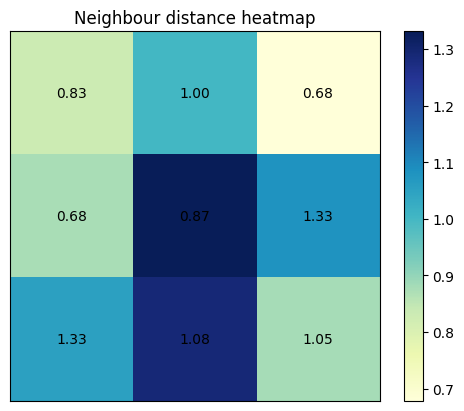

[0.8303591260518195, 0.9994665107527014, 0.6779481660963996, 0.8746188019923278, 1.3311774189100083, 1.0790020173043122, 1.051721942752824, 1.289607492019347, 0.8782681630071942]


In [7]:
plotDistanceHeatMap(distances,k)
print(distances)